In [8]:
import numpy as np
from librosa.core import stft
import Spectrogram
import matplotlib.pyplot as plt
from torch.nn.functional import conv1d
import musicnet

import torch

np.random.seed(3)

fs = 22050 # sampling rate
s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*500*s, dtype=np.float32) \
    + np.sin(2*np.pi*800*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32)  

In [9]:
bin_max = 100

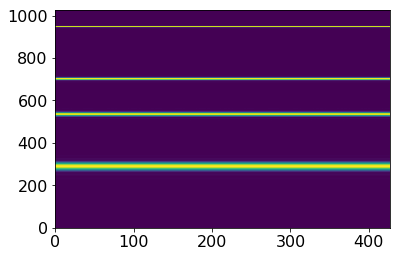

In [10]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048,center=False, window='hann'
                                    , freq_scale='log', low=110, high=2000)
spec = spec_layer(torch.tensor(x))
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower')
plt.tick_params(labelsize=16)

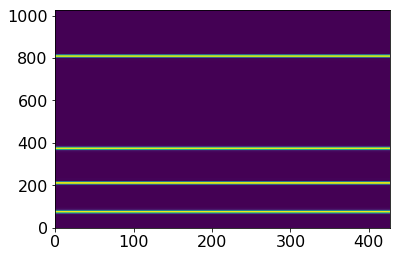

In [11]:
spec_layer = Spectrogram.STFT(hop_length=512, n_fft=2048,center=False, window='hann'
                                    , freq_scale='linear', low=110, high=2000)
spec = spec_layer(torch.tensor(x))
plt.imshow(spec[0].numpy(), aspect='auto', origin='lower')
plt.tick_params(labelsize=16)

# Librosa

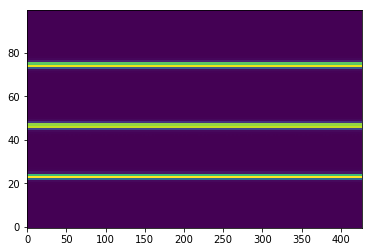

In [5]:
S_stft = np.abs(stft(x, hop_length=512, n_fft=2048,center=False, window='hann'))
plt.imshow(S_stft[:bin_max], aspect='auto', origin='lower')

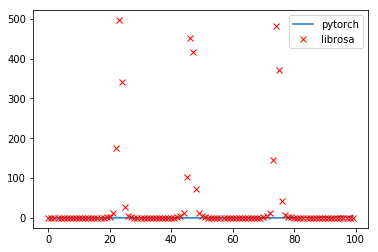

In [6]:
plt.plot(spec[0][:,0][:bin_max].numpy())
plt.plot(S_stft[:,0][:bin_max], 'rx')
plt.legend(['pytorch', 'librosa'])

In [7]:
np.allclose(S_stft, spec[0].numpy(),atol=1e-4)

False